In [1]:
## Make width of notebook 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
from datasets import data as Local ## Local module to get dataframes

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [3]:
games_df, winners_df, cumulative_stats_df, games_details_df, teams_df, players_df, ranking_df = Local.get_all_dataset_dataframes('../../datasets/')

In [4]:
winners_df # Whether the home team won in a game in each row of `games_df`

16157    1
16156    1
16155    1
16154    1
16153    1
        ..
4        0
3        0
2        0
1        1
0        1
Name: HOME_TEAM_WINS, Length: 23520, dtype: int64

In [5]:
games_df

,GAME_DATE_EST,GAME_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away
16157,2003-10-05,10300001,1610612762,1610612742,2003,90.0,0.457,0.735,0.143,23.0,41.0,85.0,0.447,0.500,0.250,20.0,38.0
16156,2003-10-06,10300002,1610612763,1610612749,2003,105.0,0.494,0.618,0.267,25.0,48.0,94.0,0.427,0.700,0.154,20.0,43.0
16155,2003-10-07,10300009,1610612758,1610612746,2003,101.0,0.467,0.871,0.444,19.0,39.0,82.0,0.368,0.609,0.364,13.0,50.0
16154,2003-10-07,10300005,1610612757,1610612745,2003,104.0,0.527,0.657,0.429,22.0,33.0,80.0,0.470,0.667,0.333,10.0,37.0
16153,2003-10-07,10300007,1610612748,1610612755,2003,86.0,0.352,0.647,0.222,15.0,55.0,79.0,0.329,0.897,0.143,7.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-12-18,12000040,1610612761,1610612748,2020,105.0,0.380,0.737,0.356,27.0,37.0,117.0,0.534,0.741,0.514,30.0,51.0
3,2020-12-18,12000039,1610612754,1610612755,2020,107.0,0.371,0.692,0.262,19.0,45.0,113.0,0.533,0.629,0.355,23.0,48.0
2,2020-12-19,12000049,1610612763,1610612737,2020,116.0,0.400,0.744,0.396,21.0,43.0,117.0,0.422,0.837,0.297,24.0,47.0
1,2020-12-19,12000048,1610612764,1610612765,2020,99.0,0.427,0.625,0.295,24.0,45.0,96.0,0.402,0.647,0.326,18.0,51.0


In [6]:
cumulative_stats_df

,DATE,GAME_ID,SEASON_TYPE,SEASON,GAMES_PLAYED_home,REB_total_home,AST_total_home,PTS_total_home,GAMES_PLAYED_away,REB_total_away,...,FG_PCT_total_home,FT_PCT_total_home,FG3_PCT_total_away,APG_total_away,PPG_total_away,RPG_total_away,FG_PCT_total_away,FT_PCT_total_away,TEAM_ID_away,TEAM_ID_home
0,2003-10-05,10300001,1,2003,1,41.0,23.0,90.0,1,38.0,...,0.457000,0.735000,0.25000,20.0,85.00,38.00,0.44700,0.50000,1610612742,1610612762
1,2003-10-06,10300002,1,2003,1,48.0,25.0,105.0,1,43.0,...,0.494000,0.618000,0.15400,20.0,94.00,43.00,0.42700,0.70000,1610612749,1610612763
2,2003-10-07,10300009,1,2003,1,39.0,19.0,101.0,1,50.0,...,0.467000,0.871000,0.36400,13.0,82.00,50.00,0.36800,0.60900,1610612746,1610612758
3,2003-10-07,10300005,1,2003,1,33.0,22.0,104.0,1,37.0,...,0.527000,0.657000,0.33300,10.0,80.00,37.00,0.47000,0.66700,1610612745,1610612757
4,2003-10-07,10300007,1,2003,1,55.0,15.0,86.0,1,44.0,...,0.352000,0.647000,0.14300,7.0,79.00,44.00,0.32900,0.89700,1610612755,1610612748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,2020-12-18,12000040,1,2020,3,120.0,77.0,328.0,2,86.0,...,0.422333,0.706333,0.39850,28.0,104.50,43.00,0.48050,0.77950,1610612748,1610612761
23516,2020-12-18,12000039,1,2020,3,116.0,71.0,317.0,2,90.0,...,0.415667,0.643333,0.29800,23.0,110.50,45.00,0.50200,0.68950,1610612755,1610612754
23517,2020-12-19,12000049,1,2020,4,201.0,113.0,474.0,4,215.0,...,0.450000,0.714500,0.32350,24.0,112.75,53.75,0.40000,0.80150,1610612737,1610612763
23518,2020-12-19,12000048,1,2020,3,134.0,68.0,299.0,4,176.0,...,0.419000,0.678000,0.33125,19.5,94.00,44.00,0.41050,0.69650,1610612765,1610612764


## Remove non-data

In [10]:
cumulative_stats_copy_df = cumulative_stats_df.copy()
for key in ['DATE','GAME_ID','TEAM_ID_home','TEAM_ID_away','SEASON_TYPE','SEASON','GAMES_PLAYED_home','GAMES_PLAYED_away']:
    del cumulative_stats_copy_df[key]
# Only look at home teams
# cumulative_stats_copy_df = cumulative_stats_copy_df.loc[cumulative_stats_copy_df['AT_HOME']==True]
# del cumulative_stats_copy_df['AT_HOME']
cumulative_stats_copy_df

,REB_total_home,AST_total_home,PTS_total_home,REB_total_away,AST_total_away,PTS_total_away,FG3_PCT_total_home,APG_total_home,PPG_total_home,RPG_total_home,FG_PCT_total_home,FT_PCT_total_home,FG3_PCT_total_away,APG_total_away,PPG_total_away,RPG_total_away,FG_PCT_total_away,FT_PCT_total_away
0,41.0,23.0,90.0,38.0,20.0,85.0,0.143000,23.000000,90.000000,41.000000,0.457000,0.735000,0.25000,20.0,85.00,38.00,0.44700,0.50000
1,48.0,25.0,105.0,43.0,20.0,94.0,0.267000,25.000000,105.000000,48.000000,0.494000,0.618000,0.15400,20.0,94.00,43.00,0.42700,0.70000
2,39.0,19.0,101.0,50.0,13.0,82.0,0.444000,19.000000,101.000000,39.000000,0.467000,0.871000,0.36400,13.0,82.00,50.00,0.36800,0.60900
3,33.0,22.0,104.0,37.0,10.0,80.0,0.429000,22.000000,104.000000,33.000000,0.527000,0.657000,0.33300,10.0,80.00,37.00,0.47000,0.66700
4,55.0,15.0,86.0,44.0,7.0,79.0,0.222000,15.000000,86.000000,55.000000,0.352000,0.647000,0.14300,7.0,79.00,44.00,0.32900,0.89700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,120.0,77.0,328.0,86.0,56.0,209.0,0.354000,25.666667,109.333333,40.000000,0.422333,0.706333,0.39850,28.0,104.50,43.00,0.48050,0.77950
23516,116.0,71.0,317.0,90.0,46.0,221.0,0.342667,23.666667,105.666667,38.666667,0.415667,0.643333,0.29800,23.0,110.50,45.00,0.50200,0.68950
23517,201.0,113.0,474.0,215.0,96.0,451.0,0.346000,28.250000,118.500000,50.250000,0.450000,0.714500,0.32350,24.0,112.75,53.75,0.40000,0.80150
23518,134.0,68.0,299.0,176.0,78.0,376.0,0.312667,22.666667,99.666667,44.666667,0.419000,0.678000,0.33125,19.5,94.00,44.00,0.41050,0.69650


## Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    cumulative_stats_copy_df,
    winners_df,
    random_state=0,
)

## Train decision tree w/o pruning

In [12]:
decision_tree_clf = DecisionTreeClassifier(random_state=0)
decision_tree_clf.fit(X_train, y_train)
print('Decision tree accuracy (no pruning): %.2f' % decision_tree_clf.score(X_test, y_test))

Decision tree accuracy (no pruning): 0.58


In [13]:
from sklearn.tree import plot_tree
from yellowbrick.model_selection import FeatureImportances

In [14]:
# plt.figure(figsize=(15,10))
# t = plot_tree(decision_tree_clf)

In [15]:
def plot_feature_importances(clf):
    viz = FeatureImportances(
        clf,
        labels=cumulative_stats_copy_df.columns,
    )
    viz.fit(
        cumulative_stats_copy_df,
        winners_df,
    )
    viz.show()

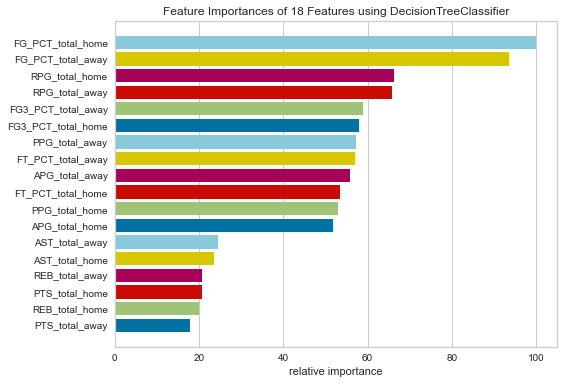

In [16]:
plot_feature_importances(decision_tree_clf)

## Do cross validation searches

In [17]:
# Get best params based from CV function
def do_cv(classifier, cv_fun, params, x, y, **kwargs):
    clf = cv_fun(
        classifier,
        params,
        scoring='accuracy', # Optimize for the 'accuracy' score of the model.
        **kwargs,
    )
    clf.fit(x, y)
    return clf

In [18]:
decision_tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [19]:
cv_maxdepth_clf = do_cv(
    DecisionTreeClassifier(random_state=0),
    GridSearchCV,
    {
        'max_depth': [*range(4,100)],
        'criterion': ['gini', 'entropy'],
    },
    X_train,
    y_train,
#     random_state=0,
)
print('Best decision tree accuracy (%s): %.2f' % (str(cv_maxdepth_clf.best_params_), cv_maxdepth_clf.score(X_test, y_test)))

Best decision tree accuracy ({'criterion': 'entropy', 'max_depth': 5}): 0.63


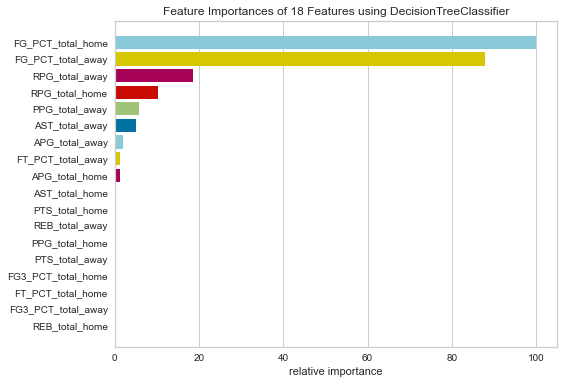

In [20]:
plot_feature_importances(cv_maxdepth_clf.best_estimator_)

In [21]:
cv_max_leaves_clf = do_cv(
    DecisionTreeClassifier(random_state=0),
    GridSearchCV,
    {
        'max_leaf_nodes': [*range(2,100)],
        'criterion': ['gini', 'entropy'],
    },
    X_train,
    y_train,
#     random_state=0,
)
print('Best decision tree accuracy (%s): %.2f' % (str(cv_max_leaves_clf.best_params_), cv_max_leaves_clf.score(X_test, y_test)))

Best decision tree accuracy ({'criterion': 'entropy', 'max_leaf_nodes': 28}): 0.63


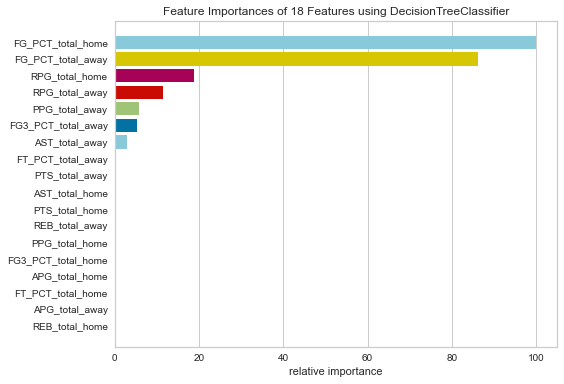

In [22]:
plot_feature_importances(cv_max_leaves_clf.best_estimator_)

In [23]:
cv_max_features_clf = do_cv(
    DecisionTreeClassifier(random_state=0),
    GridSearchCV,
    {
        'max_features': [*range(1,len(cumulative_stats_df.columns)//2+1), 'sqrt', 'log2', None],
        'criterion': ['gini', 'entropy'],
    },
    X_train,
    y_train,
#     random_state=0,
)
print('Best decision tree accuracy (%s): %.2f' % (str(cv_max_features_clf.best_params_), cv_max_features_clf.score(X_test, y_test)))

Best decision tree accuracy ({'criterion': 'entropy', 'max_features': 10}): 0.57


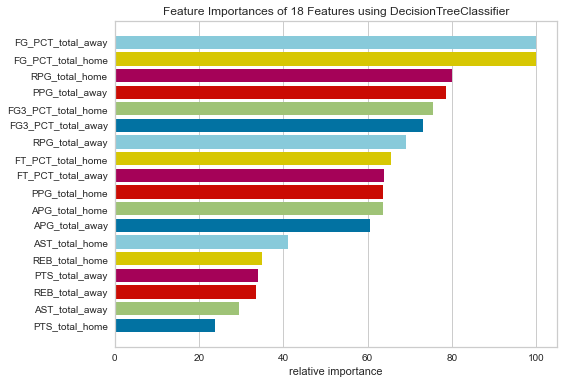

In [24]:
plot_feature_importances(cv_max_features_clf.best_estimator_)

In [25]:
from sklearn.decomposition import PCA